In [208]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sci
import scipy.stats as scistats
from mcareader import Mca
import scipy.signal as fp
import os
import re

In [209]:
def extract_mca_data(file_path):
    data_values = []
    inside_data_section = False

    with open(file_path, 'r') as file:
        for line in file:
            line = line.strip()
            if line == "<<DATA>>":
                inside_data_section = True
                continue
            if line == "<<END>>":
                break
            if inside_data_section and line.isdigit():
                data_values.append(int(line))
    return data_values

In [210]:
def bkg_corrector(bkg_list,data_list):
    bkg_corr_data_list=[]
    for i in range(0,len(bkg_list)):
        bkg_corr_data=data_list[i]-bkg_list[i]
        bkg_corr_data_list.append(bkg_corr_data)
    bkg_corr_data_list=np.array(bkg_corr_data_list).clip(min=0)
    return bkg_corr_data_list

In [211]:
def gaussian(x, a, mu, sigma):
    return a*np.exp(-(x - mu)**2 / (2 * sigma**2))
#defining the gaussian

In [212]:
def peak_fitter(function, channel, data_list,fit_range,init_guess):
    mu, cov=sci.curve_fit(function,channel[fit_range[0]:fit_range[1]],data_list[fit_range[0]:fit_range[1]],p0=init_guess,maxfev=3000)
    gauss=gaussian(channel[fit_range[0]:fit_range[1]],*mu)
    channel_no_ranged=channel[fit_range[0]:fit_range[1]]
    return channel_no_ranged, gauss, mu, cov

In [213]:
def graphfitter(range_list,num_peak,function,channels,bkg_corr_data,p0_list):
    ranged_channel_list=[]
    fit_gauss_list=[]
    # for peak_num in num_peak:
    for peaks in range(0,num_peak):
        ranged_channel,fit_gauss,mu,cov = peak_fitter(function,channels,bkg_corr_data,range_list[peaks],p0_list[peaks])
        ranged_channel_list.append(ranged_channel)
        fit_gauss_list.append(fit_gauss)
        centroid_error=np.sqrt(np.diag(cov))
        print(f"The fitting range for peak {peaks}:",ranged_channel[0],ranged_channel[-1])
        print(f"The centroid for peak {peaks}:",mu[1])
        print(f"The error on the centroid fit for peak {peaks}:", centroid_error[1])
    return ranged_channel_list, fit_gauss_list

In [214]:
bkg=extract_mca_data("team_battery/bkg_10_1789.mca")

In [215]:
raw_E_spectrum_fe=extract_mca_data("team_battery/am_10_1790_spectrum.mca")
raw_E_spectrum_am=extract_mca_data("team_battery/fe_10_1789_spectrum.mca")
raw_E_spectrum_ba=extract_mca_data("team_battery/ba_10_1790_spectrum.mca")

In [216]:
channel_no=np.arange(1,len(raw_E_spectrum_fe)+1)

In [217]:
E_spectrum_fe=bkg_corrector(bkg,raw_E_spectrum_fe)
E_spectrum_am=bkg_corrector(bkg,raw_E_spectrum_am)
E_spectrum_ba=bkg_corrector(bkg,raw_E_spectrum_ba)

Text(0.5, 1.0, 'Energy Spectrum of Fe 55')

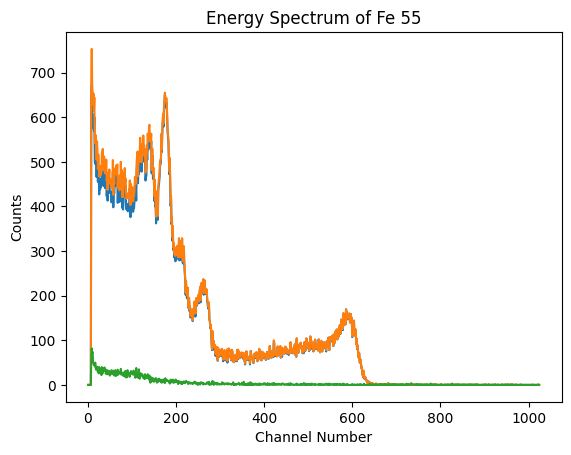

In [218]:
plt.plot(channel_no,E_spectrum_fe)
plt.plot(channel_no,raw_E_spectrum_fe)
plt.plot(channel_no,bkg)
plt.xlabel("Channel Number")
plt.ylabel("Counts")
plt.title("Energy Spectrum of Fe 55")
# plt.xlim(400,650)

The fitting range for peak 0: 27 35
The centroid for peak 0: 31.618991146926287
The error on the centroid fit for peak 0: 0.18621426500320087
The fitting range for peak 1: 53 72
The centroid for peak 1: 61.39341365150894
The error on the centroid fit for peak 1: 0.07780334401744748


(0.0, 200.0)

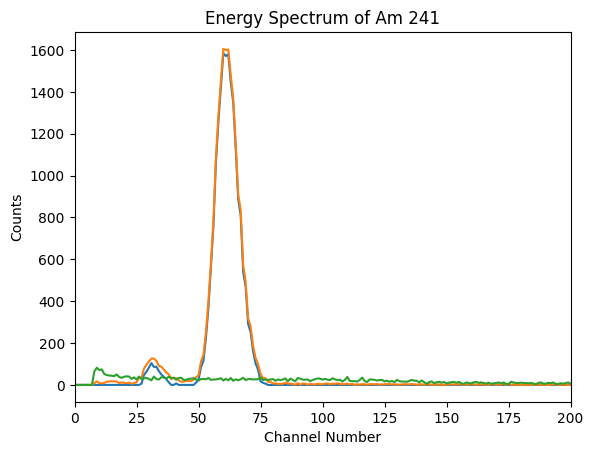

In [219]:
am_fitting_range=[[26,35],[52,72]]
am_p0=[[100,33,10],[1600,60,10]]
graphfitter(am_fitting_range,2,gaussian,channel_no,E_spectrum_am,am_p0)
plt.plot(channel_no,E_spectrum_am)
plt.plot(channel_no,raw_E_spectrum_am)
plt.plot(channel_no,bkg)
plt.xlabel("Channel Number")
plt.ylabel("Counts")
plt.title("Energy Spectrum of Am 241")
plt.xlim(0,200)

(0.0, 400.0)

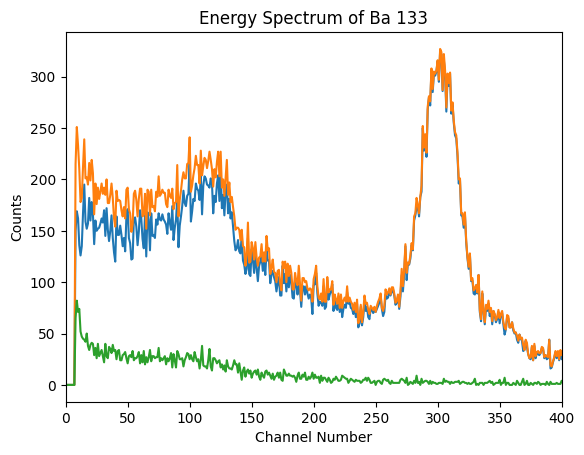

In [220]:
plt.plot(channel_no,E_spectrum_ba)
plt.plot(channel_no,raw_E_spectrum_ba)
plt.plot(channel_no,bkg)
plt.xlabel("Channel Number")
plt.ylabel("Counts")
plt.title("Energy Spectrum of Ba 133")
plt.xlim(0,400)